In [251]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,  StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.impute import KNNImputer, SimpleImputer

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score

###loading the train data

In [252]:
train_da = pd.read_csv('/content/train_ctrUa4K.csv')
test_da = pd.read_csv('/content/test_lAUu6dG.csv')

In [253]:
train_da.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [254]:
train_da.drop(['Loan_ID'], axis = 1, inplace = True )

In [255]:
train_da.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Understanding the training file

In [256]:
train_da.shape

(614, 12)

In [257]:
train_da.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [258]:
train_da.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [259]:
train_da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


### Understanding null values in the data set

In [260]:
train_da.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Replacing null values in train data

In [261]:
train_daf = train_da

In [262]:
train_daf['Gender'].fillna(train_daf['Gender'].mode()[0], inplace=True)
train_daf['Married'].fillna(train_daf['Married'].mode()[0], inplace=True)
train_daf['Dependents'].fillna(train_daf['Dependents'].mode()[0], inplace=True)
train_daf['Self_Employed'].fillna(train_daf['Self_Employed'].mode()[0], inplace=True)
train_daf['LoanAmount'].fillna(train_daf['LoanAmount'].mode()[0], inplace=True)
train_daf['Loan_Amount_Term'].fillna(train_daf['Loan_Amount_Term'].mode()[0], inplace=True)
train_daf['Credit_History'].fillna(train_daf['Credit_History'].mode()[0], inplace=True)

In [263]:
train_daf

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [264]:
train_daf.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

###Relationship between Variables in the data set

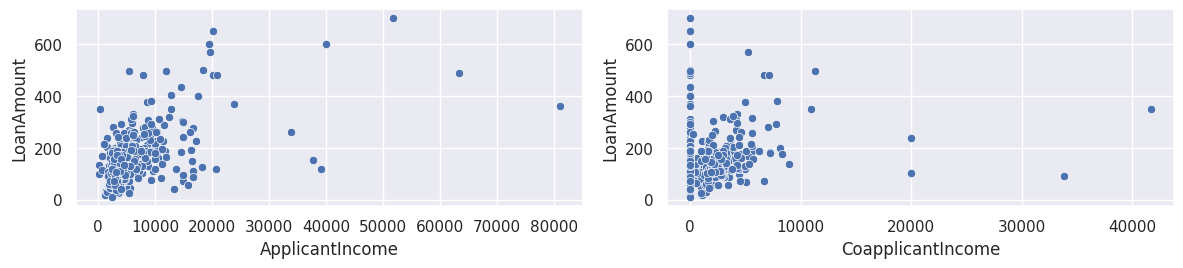

In [265]:
plt.figure(figsize=(12,5))

plt.subplot(2,2,1)
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', data=train_daf)
plt.subplot(2,2,2)
sns.scatterplot(x='CoapplicantIncome', y='LoanAmount', data=train_daf)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 49.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 62.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


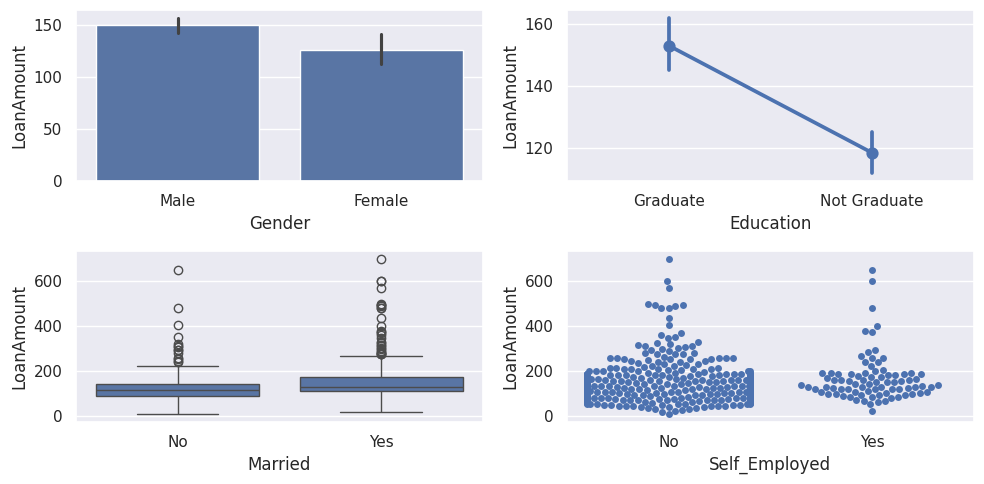

In [266]:
plt.figure(figsize=(10,5))

plt.subplot(2,2,1)
sns.barplot(x='Gender', y='LoanAmount', data=train_daf)
plt.subplot(2,2,2)
sns.pointplot(x='Education', y='LoanAmount', data=train_daf)

plt.subplot(2,2,3)
sns.boxplot(x='Married', y='LoanAmount', data=train_daf)
plt.subplot(2,2,4)
sns.swarmplot(x='Self_Employed', y='LoanAmount', data=train_daf)

plt.tight_layout()
plt.show()

In [267]:
loan_app = train_daf.Self_Employed.groupby ([train_daf ['Credit_History'],train_daf['Loan_Status']]).count().astype(int)

In [268]:
loan_app

Credit_History  Loan_Status
0.0             N               82
                Y                7
1.0             N              110
                Y              415
Name: Self_Employed, dtype: int64

<Axes: xlabel='Credit_History', ylabel='count'>

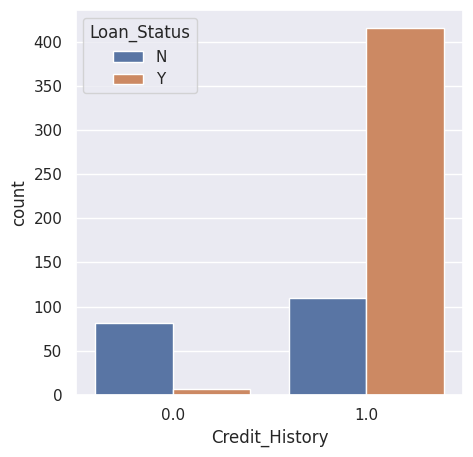

In [269]:
plt.figure(figsize=(5,5))
sns.countplot(x='Credit_History', data=train_daf,hue='Loan_Status')

### Finding outliers in the dataset



###Box Plot indicating outliers in the database

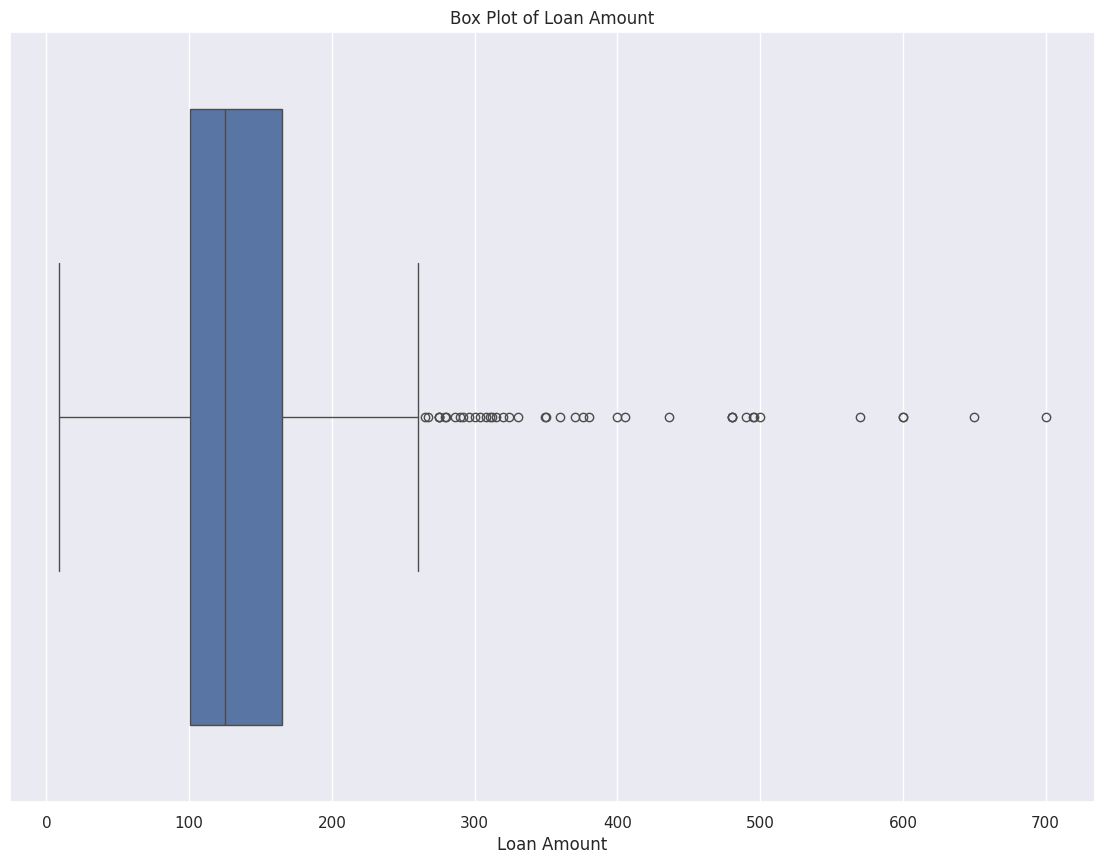

In [270]:
sns.boxplot(x=train_daf["LoanAmount"])

plt.xlabel("Loan Amount")
plt.title("Box Plot of Loan Amount")

plt. show()

###Finding outliers using Z-scores

In [271]:
data_tr_ol = train_daf['LoanAmount']

z_scores = (data_tr_ol - data_tr_ol.mean()) / data_tr_ol.std()

In [272]:
z_scores.mean()

-5.207560766971418e-17

In [276]:
threshold = 2.5

In [277]:
outliers = data_tr_ol[abs(z_scores) > threshold]

In [278]:
print("Training Set outliers:")
outliers

Training Set outliers:


126    370.0
130    650.0
155    600.0
171    700.0
177    495.0
278    436.0
308    480.0
325    376.0
333    490.0
369    570.0
372    380.0
409    360.0
432    405.0
487    500.0
506    480.0
523    480.0
525    400.0
561    600.0
604    496.0
Name: LoanAmount, dtype: float64

In [279]:
outliers.count()

19

In [280]:
non_outliers = data_tr_ol[abs(z_scores) <= threshold]

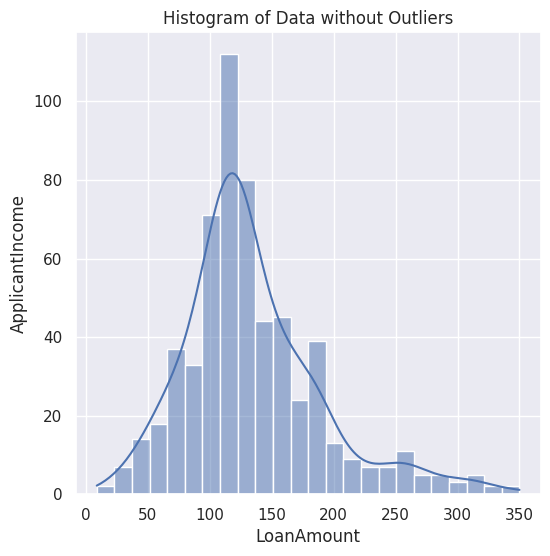

In [281]:
plt.figure(figsize=(6, 6))
sns.histplot(non_outliers, kde=True)
plt.title('Histogram of Data without Outliers')
plt.xlabel('LoanAmount')
plt.ylabel('ApplicantIncome')
plt.show()

In [282]:
non_outliers.count()

595

###Encoding Categorical values

In [283]:
data_train_le=train_daf

In [286]:
le = LabelEncoder()

In [288]:

data_train_le['Gender'] = le.fit_transform(data_train_le['Gender'])
data_train_le['Married'] = le.fit_transform(data_train_le['Married'])
data_train_le['Dependents'] = le.fit_transform(data_train_le ['Dependents'])
data_train_le['Education'] = le.fit_transform(data_train_le['Education'])
data_train_le['Self_Employed'] = le.fit_transform(data_train_le['Self_Employed'])
data_train_le['Property_Area'] = le.fit_transform(data_train_le['Property_Area'])
data_train_le['Loan_Status'] = le.fit_transform(data_train_le['Loan_Status'])

In [289]:
data_train_le.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
6,1,1,0,1,0,2333,1516.0,95.0,360.0,1.0,2,1
7,1,1,3,0,0,3036,2504.0,158.0,360.0,0.0,1,0
8,1,1,2,0,0,4006,1526.0,168.0,360.0,1.0,2,1
9,1,1,1,0,0,12841,10968.0,349.0,360.0,1.0,1,0


In [290]:
data_train_le.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 57.7 KB


### Data Normalization using MinMax Scaler

In [291]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [292]:
scaler.fit(data_train_le)
data_train_le

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


## Selecting Features

###Finding Correlation between variables

In [293]:
corr_test = data_train_le.corr(method = 'pearson')
corr_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.106404,-0.074030,0.009170,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.146212,-0.100912,0.010938,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163017,-0.103864,-0.040160,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.169436,-0.073928,-0.073658,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.114971,-0.033739,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.564698,-0.046531,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.189723,-0.059383,0.011134,0.010522,-0.059187
LoanAmount,0.106404,0.146212,0.163017,-0.169436,0.114971,0.564698,0.189723,1.000000,0.037152,-0.000250,-0.047414,-0.031808
Loan_Amount_Term,-0.074030,-0.100912,-0.103864,-0.073928,-0.033739,-0.046531,-0.059383,0.037152,1.000000,-0.004705,-0.076120,-0.022549
Credit_History,0.009170,0.010938,-0.040160,-0.073658,-0.001550,-0.018615,0.011134,-0.000250,-0.004705,1.000000,0.001963,0.540556


## Heat Map - Showing the relationship between various numerical variables in the data set

<Axes: >

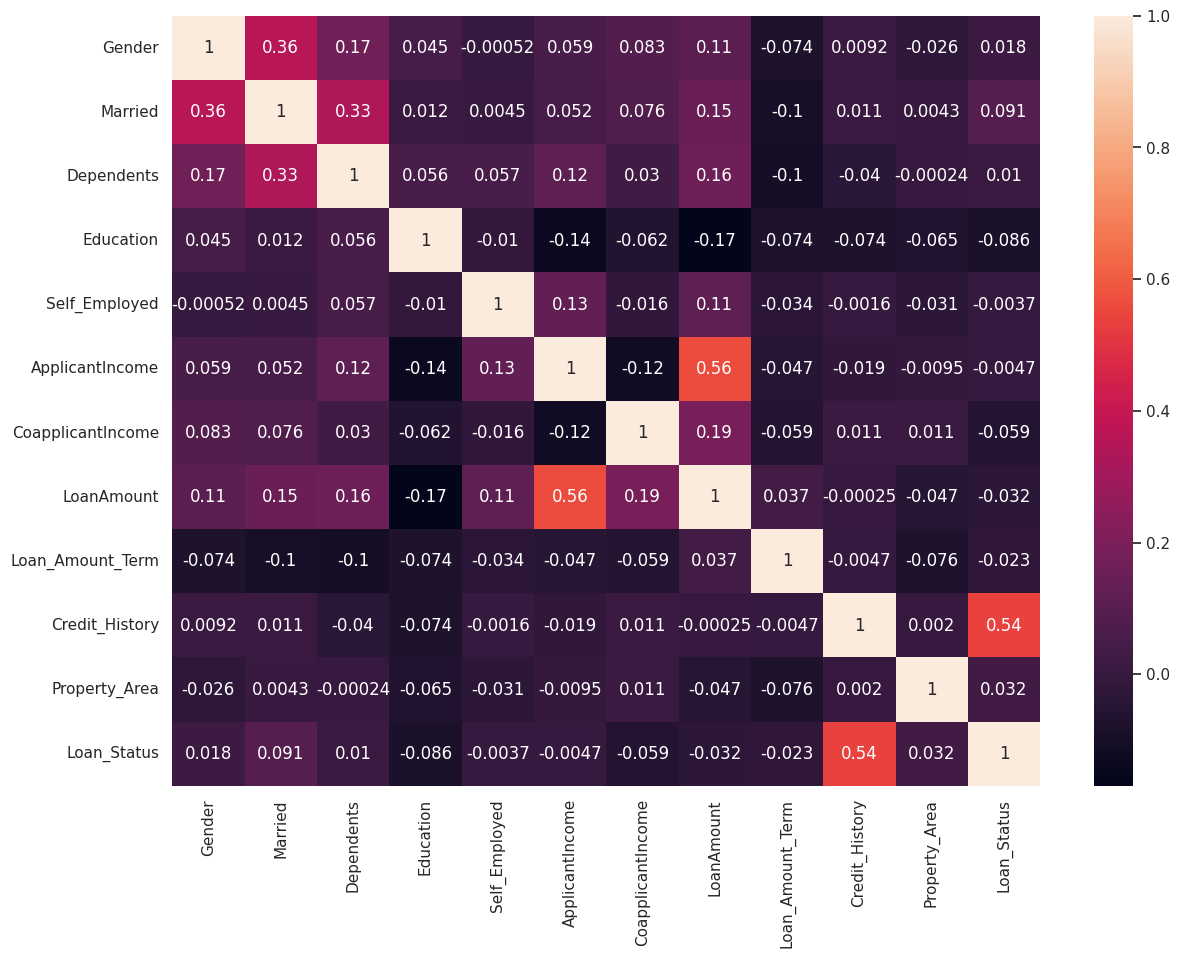

In [294]:
sns.set(rc={"figure.figsize":(14, 10)}) #width=6, height=5
sns.heatmap(data=data_train_le.corr(),annot=True)

### There is a corelation between Applicant income and loan Amount, as well as credit history and loan status

###Training the Data

In [295]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [296]:
x = data_train_le.drop('Loan_Status',axis=1)
y = data_train_le["Loan_Status"]

In [299]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.30, random_state=42)

In [300]:
print(f'x_train = {x_train.shape}')
print(f'x_test = {x_test.shape}')
print(f'y_train = {y_train.shape}')
print(f'y_test = {y_test.shape}')

x_train = (429, 11)
x_test = (185, 11)
y_train = (429,)
y_test = (185,)


In [301]:
print (x_train)

     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
553       1        1           0          1              0             2454   
601       1        1           0          1              0             2894   
261       1        0           0          0              0             2060   
496       1        1           0          1              0             2600   
529       1        0           0          1              0             6783   
..      ...      ...         ...        ...            ...              ...   
71        1        1           2          1              1             1875   
106       1        1           2          0              0            11417   
270       0        0           0          0              0             3237   
435       0        1           0          0              0            10047   
102       1        1           0          0              0            13650   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

In [302]:
print (y_train)

553    0
601    1
261    1
496    1
529    1
      ..
71     1
106    1
270    1
435    1
102    1
Name: Loan_Status, Length: 429, dtype: int64


## Decision Tree Classifier

In [303]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split

from sklearn import metrics

In [304]:
cl=DecisionTreeClassifier(random_state=1,criterion="entropy", max_depth=3)

In [305]:
cl.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=1)

In [306]:
y_pred = cl.predict(x_test)

In [307]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7783783783783784


## KNN model

In [308]:
from sklearn import neighbors, datasets, preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

In [309]:
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

In [310]:
print(accuracy_score(y_test, y_pred))

0.5621621621621622


In [311]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.25      0.12      0.16        65
           1       0.63      0.80      0.70       120

    accuracy                           0.56       185
   macro avg       0.44      0.46      0.43       185
weighted avg       0.49      0.56      0.51       185



In [312]:
print(confusion_matrix(y_test, y_pred))

[[ 8 57]
 [24 96]]


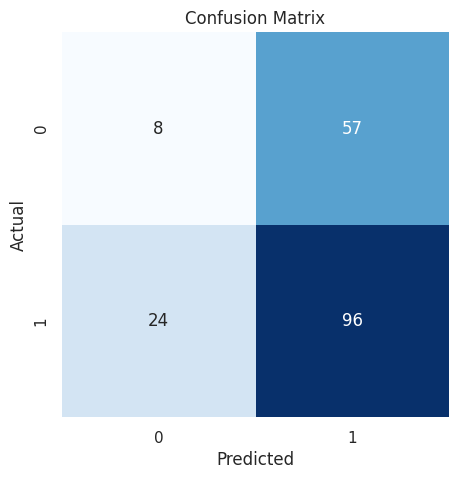

In [313]:
plt.figure(figsize=(5, 5))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Random Forest Classifier

In [318]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)

In [319]:
x_train.shape, x_test.shape

((429, 11), (185, 11))

In [320]:
x_train.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
553,1,1,0,1,0,2454,2333.0,181.0,360.0,0.0,2
601,1,1,0,1,0,2894,2792.0,155.0,360.0,1.0,0
261,1,0,0,0,0,2060,2209.0,134.0,360.0,1.0,1
496,1,1,0,1,0,2600,1700.0,107.0,360.0,1.0,0
529,1,0,0,1,0,6783,0.0,130.0,360.0,1.0,1


In [321]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=0)
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)

In [322]:

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.7784


##SVM Model

In [323]:
from sklearn.svm import SVC

In [324]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

svm_classifier = SVC(kernel='rbf', gamma='scale')

svm_classifier.fit(x_train, y_train)

y_pred = svm_classifier.predict(x_test)

In [325]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [326]:
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.65
Confusion Matrix:
[[  0  72]
 [  0 131]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        72
           1       0.65      1.00      0.78       131

    accuracy                           0.65       203
   macro avg       0.32      0.50      0.39       203
weighted avg       0.42      0.65      0.51       203



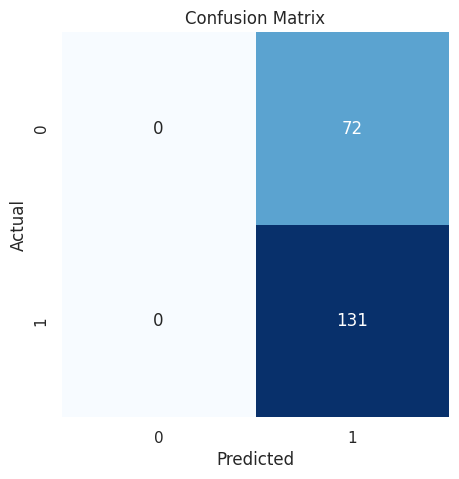

In [327]:
# Plot the confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## K-fold Cross Validation

In [328]:
x = data_train_le.drop('Loan_Status',axis=1)
y = data_train_le["Loan_Status"]

In [329]:
from sklearn.model_selection import KFold
kfold_validator  = KFold(10)
for train_index,test_index in kfold_validator.split(x,y):
    print('Training Index: ', train_index)
    print('Testing Index: ',test_index)

Training Index:  [ 62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79
  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115
 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133
 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151
 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169
 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187
 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205
 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223
 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241
 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259
 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277
 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295
 296 297 298 299 300 301 302 303 3

In [330]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 42, test_size = 0.33)

In [331]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression()
LR_model = LR_model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [332]:
from sklearn.model_selection import cross_val_score
cv_result = cross_val_score(LR_model,x,y,cv = kfold_validator)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [333]:
cv_result

array([0.77419355, 0.83870968, 0.74193548, 0.77419355, 0.78688525,
       0.83606557, 0.85245902, 0.83606557, 0.80327869, 0.83606557])

In [334]:
np.mean(cv_result)

0.8079851930195663

## Stratified K-Fold Cross Validation

In [335]:
from sklearn.model_selection import StratifiedKFold
skfold_validator = StratifiedKFold(n_splits = 10)

In [336]:
for train_index,test_index in skfold_validator.split(x,y):
    print('Training Index: ', train_index)
    print('Testing Index: ',test_index)

Training Index:  [ 53  54  57  62  63  64  65  66  69  71  72  73  74  75  76  77  78  79
  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115
 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133
 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151
 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169
 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187
 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205
 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223
 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241
 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259
 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277
 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295
 296 297 298 299 300 301 302 303 3

In [337]:
cv_result1 = cross_val_score(LR_model,x,y,cv = skfold_validator)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [338]:
cv_result1

array([0.80645161, 0.82258065, 0.74193548, 0.75806452, 0.78688525,
       0.78688525, 0.85245902, 0.85245902, 0.80327869, 0.81967213])

In [339]:
np.mean(cv_result1)

0.8030671602326811

#Evaluating the Test File

In [371]:
test_da = pd.read_csv('/content/test_lAUu6dG.csv')

In [372]:
test_da.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [373]:
test_da.shape

(367, 12)

In [374]:
test_dan = test_da.drop(['Loan_ID'], axis = 1)

In [375]:
test_dan.shape

(367, 11)

In [376]:
test_dan.isnull().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [377]:
test_dan['Gender'].fillna(test_dan['Gender'].mode().values[0],inplace=True)

test_dan['Dependents'].fillna(test_dan['Gender'].mode().values[0],inplace=True)

test_dan['Self_Employed'].fillna(test_dan['Self_Employed'].mode().values[0],inplace=True)

test_dan['LoanAmount'].fillna(test_dan['LoanAmount'].mean(),inplace=True)

test_dan['Loan_Amount_Term'].fillna(test_dan['Loan_Amount_Term'].mean(),inplace=True)

test_dan['Credit_History'].fillna(test_dan['Credit_History'].mean(),inplace=True)

In [378]:
test_dan.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [379]:
test_dan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             367 non-null    object 
 1   Married            367 non-null    object 
 2   Dependents         367 non-null    object 
 3   Education          367 non-null    object 
 4   Self_Employed      367 non-null    object 
 5   ApplicantIncome    367 non-null    int64  
 6   CoapplicantIncome  367 non-null    int64  
 7   LoanAmount         367 non-null    float64
 8   Loan_Amount_Term   367 non-null    float64
 9   Credit_History     367 non-null    float64
 10  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 31.7+ KB


In [380]:
le = LabelEncoder()

In [381]:
test_dan['Gender'] = le.fit_transform(test_dan['Gender'])

test_dan['Married'] = le.fit_transform(test_dan['Married'])

test_dan['Dependents'] = le.fit_transform(test_dan['Dependents'])

test_dan['Education'] = le.fit_transform(test_dan['Education'])

test_dan['Self_Employed'] = le.fit_transform(test_dan['Self_Employed'])

test_dan['Property_Area'] = le.fit_transform(test_dan['Property_Area'])

In [382]:
test_dan.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,5720,0,110.0,360.0,1.000000,2
1,1,1,1,0,0,3076,1500,126.0,360.0,1.000000,2
2,1,1,2,0,0,5000,1800,208.0,360.0,1.000000,2
3,1,1,2,0,0,2340,2546,100.0,360.0,0.825444,2
4,1,0,0,1,0,3276,0,78.0,360.0,1.000000,2
5,1,1,0,1,1,2165,3422,152.0,360.0,1.000000,2
6,0,0,1,1,0,2226,0,59.0,360.0,1.000000,1
7,1,1,2,1,0,3881,0,147.0,360.0,0.000000,0
8,1,1,2,0,0,13633,0,280.0,240.0,1.000000,2
9,1,0,0,1,0,2400,2400,123.0,360.0,1.000000,1


In [383]:
test_dan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             367 non-null    int64  
 1   Married            367 non-null    int64  
 2   Dependents         367 non-null    int64  
 3   Education          367 non-null    int64  
 4   Self_Employed      367 non-null    int64  
 5   ApplicantIncome    367 non-null    int64  
 6   CoapplicantIncome  367 non-null    int64  
 7   LoanAmount         367 non-null    float64
 8   Loan_Amount_Term   367 non-null    float64
 9   Credit_History     367 non-null    float64
 10  Property_Area      367 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 31.7 KB


In [384]:
test_dan[test_dan < 0] = 0

In [385]:
test_dan.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,367.0,0.809264,0.393417,0.0,1.0,1.0,1.0,1.0
Married,367.0,0.634877,0.482122,0.0,0.0,1.0,1.0,1.0
Dependents,367.0,0.915531,1.176247,0.0,0.0,0.0,2.0,4.0
Education,367.0,0.228883,0.420687,0.0,0.0,0.0,0.0,1.0
Self_Employed,367.0,0.100817,0.301498,0.0,0.0,0.0,0.0,1.0
ApplicantIncome,367.0,4805.599455,4910.685399,0.0,2864.0,3786.0,5060.0,72529.0
CoapplicantIncome,367.0,1569.577657,2334.232099,0.0,0.0,1025.0,2430.5,24000.0
LoanAmount,367.0,136.132597,60.946040,28.0,101.0,126.0,157.5,550.0
Loan_Amount_Term,367.0,342.537396,64.620366,6.0,360.0,360.0,360.0,480.0
Credit_History,367.0,0.825444,0.364778,0.0,1.0,1.0,1.0,1.0


##Feature Extraction

In [427]:
x=train_da.drop(columns=['Loan_Status'])

In [430]:
y_train=train_da['Loan_Status'].values

In [431]:
y_train

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

In [450]:
y_train.shape

(614,)

In [432]:
x_train=x.values

In [433]:
x_train

array([[  1.,   0.,   0., ..., 360.,   1.,   2.],
       [  1.,   1.,   1., ..., 360.,   1.,   0.],
       [  1.,   1.,   0., ..., 360.,   1.,   2.],
       ...,
       [  1.,   1.,   1., ..., 360.,   1.,   2.],
       [  1.,   1.,   2., ..., 360.,   1.,   2.],
       [  0.,   0.,   0., ..., 360.,   0.,   1.]])

In [449]:
x_train.shape

(614, 11)

# Deployment

## Decision Tree Matrix

In [435]:
from sklearn.tree import DecisionTreeClassifier
dst_cl=DecisionTreeClassifier(random_state=1,criterion="entropy")

In [436]:
dst_cl.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [454]:
y_pred = dst_cl.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [455]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1])

In [456]:
y_test.shape, y_train.shape, x_test.shape, x_train.shape, y_pred.shape

((203,), (614,), (203, 11), (614, 11), (203,))

In [457]:
pre_data=pd.DataFrame(y_pred,columns=["Loan_Status"])

In [458]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [442]:
sample=pd.read_csv("/content/sample_submission_49d68Cx.csv")

In [443]:
sample.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [444]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Loan_ID      367 non-null    object
 1   Loan_Status  367 non-null    object
dtypes: object(2)
memory usage: 5.9+ KB


In [415]:
data_pr=pd.DataFrame(y_pred,columns=["Loan_Status"])

In [445]:
data_pr.shape

(203, 1)

In [446]:
data_pr=data_pr.replace(1,'Y')

In [447]:
data_pr=data_pr.replace(0,'N')

In [448]:
data_pr.head

<bound method NDFrame.head of     Loan_Status
0             Y
1             Y
2             Y
3             Y
4             Y
..          ...
198           N
199           Y
200           Y
201           Y
202           Y

[203 rows x 1 columns]>

In [459]:
sample=sample.drop(columns=['Loan_Status'],axis=1)

In [460]:
sample['Loan_Status']=data_pr['Loan_Status']

In [462]:
sample.head

<bound method NDFrame.head of       Loan_ID Loan_Status
0    LP001015           Y
1    LP001022           Y
2    LP001031           Y
3    LP001035           Y
4    LP001051           Y
..        ...         ...
362  LP002971         NaN
363  LP002975         NaN
364  LP002980         NaN
365  LP002986         NaN
366  LP002989         NaN

[367 rows x 2 columns]>